In [573]:
import os
from os import environ

import requests
import io
import string

import datetime

import numpy as np
import pandas as pd

from pandas import Series
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [574]:
cluster_variables=['Route','Flight Number','Weekday','SEASON']

In [575]:
Raw=pd.read_csv('JAN2017_APR2019_R.csv',sep=';')

# Raw=pd.concat([pd.read_csv('JAN2017_DEC2017.csv',sep=';'),
# pd.read_csv('JAN2018_DEC2018.csv',sep=';'),
# pd.read_csv('JAN2019_APR2019.csv',sep=';')])

Raw['Route']=Raw['Sched Airport Depart']+'-'+Raw['Sched Airport Arriva']
Raw['Route']=Raw['Route'].apply(lambda x: 'LUX-CPH' if 'CPH' in x else 'LUX-LCY')
Raw=Raw.loc[Raw['Load Factor'].apply(lambda x: x.replace(',','').isnumeric()),:]

Raw=Raw.rename(columns={'Coupons+YQ in current bookings': 'Revenue'})

Raw['Revenue']=Raw['Revenue'].apply(lambda x: np.float(x.replace('EUR','').replace(',','.').replace(' ','')))
Raw=Raw.rename(columns={'Revenue': 'Revenue_actual'})

In [576]:
Raw['Calendar day']=Raw['Calendar day'].apply(lambda x: pd.to_datetime(x.split('/')[2]+'-'+x.split('/')[1]+'-'+x.split('/')[0]))
Raw['LF_actual']=Raw['Load Factor'].apply(lambda x: float(x.replace(',','.').replace('%',''))/100)
Raw['LF_actual']=Raw['Load Factor'].apply(lambda x: float(x.replace(',','.').replace('%','')))
Raw['Direction']=Raw[['Sched Airport Depart','Sched Airport Arriva']].apply(lambda x: 'O' if x[0]=='LUX' and (x[1]=='CPH' or x[1]=='LCY') else 'I',axis=1)

Raw=Raw.rename(columns={'Calendar day': 'Departure Date'})

In [577]:
Raw=Raw.loc[Raw['Sched Airport Depart'].apply(lambda x: (x=='CPH')|(x=='LCY')|(x=='LUX'))&\
Raw['Sched Airport Arriva'].apply(lambda x: (x=='CPH')|(x=='LCY')|(x=='LUX')),:]

In [578]:
Raw=Raw.loc[Raw['Departure Date']>=pd.to_datetime('2018-04-01'),:]

### Seasonality Clustering

In [579]:
Raw['SEASON']='M'

In [580]:
# LUX-CPH

    ## LOW

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-07-31'))&(Raw['Departure Date']<=pd.to_datetime('2017-08-11')),'SEASON']='L'    

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-07-31'))&(Raw['Departure Date']<=pd.to_datetime('2017-08-11')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-08-14'))&(Raw['Departure Date']<=pd.to_datetime('2017-09-17')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-19'))&(Raw['Departure Date']<=pd.to_datetime('2017-12-22')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-27'))&(Raw['Departure Date']<=pd.to_datetime('2018-01-07')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-07-31'))&(Raw['Departure Date']<=pd.to_datetime('2018-09-17')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-12-27'))&(Raw['Departure Date']<=pd.to_datetime('2019-01-06')),'SEASON']='L'

    ## HIGH

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-04-05'))&(Raw['Departure Date']<=pd.to_datetime('2017-04-08')),'SEASON']='H'    

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-04-28'))&(Raw['Departure Date']<=pd.to_datetime('2017-04-29')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-05-23'))&(Raw['Departure Date']<=pd.to_datetime('2017-05-25')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-06-01'))&(Raw['Departure Date']<=pd.to_datetime('2017-06-05')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-06-22'))&(Raw['Departure Date']<=pd.to_datetime('2017-06-24')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-07-13'))&(Raw['Departure Date']<=pd.to_datetime('2017-07-17')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-08-12'))&(Raw['Departure Date']<=pd.to_datetime('2017-08-13')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-10-27'))&(Raw['Departure Date']<=pd.to_datetime('2017-10-29')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-15'))&(Raw['Departure Date']<=pd.to_datetime('2017-12-18')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-02-09'))&(Raw['Departure Date']<=pd.to_datetime('2018-02-11')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']==pd.to_datetime('2018-04-01')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-27'))&(Raw['Departure Date']<=pd.to_datetime('2018-04-29')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-08'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-10')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-18'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-21')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-07-13'))&(Raw['Departure Date']<=pd.to_datetime('2018-07-18')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-08-11'))&(Raw['Departure Date']<=pd.to_datetime('2018-08-12')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-10-26'))&(Raw['Departure Date']<=pd.to_datetime('2018-10-28')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2018-12-20'))&(Raw['Departure Date']<=pd.to_datetime('2018-12-23')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2019-02-15'))&(Raw['Departure Date']<=pd.to_datetime('2019-02-17')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2019-04-05'))&(Raw['Departure Date']<=pd.to_datetime('2019-04-07')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='CPH')\
&(Raw['Departure Date']>=pd.to_datetime('2019-04-29'))&(Raw['Departure Date']<=pd.to_datetime('2019-04-30')),'SEASON']='H'

In [581]:
# CPH-LUX

    ## HIGH

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-01-01'))&(Raw['Departure Date']<=pd.to_datetime('2017-01-02')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-01-06'))&(Raw['Departure Date']<=pd.to_datetime('2017-01-08')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-11-04'))&(Raw['Departure Date']<=pd.to_datetime('2017-11-06')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-28'))&(Raw['Departure Date']<=pd.to_datetime('2018-01-03')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-01'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-02')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-08-15'))&(Raw['Departure Date']<=pd.to_datetime('2018-08-16')),'SEASON']='H'

Raw.loc[(Raw['Sched Airport Depart']=='CPH')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2019-01-01'))&(Raw['Departure Date']<=pd.to_datetime('2019-01-07')),'SEASON']='H'

In [582]:
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY'),'SEASON']='H'
Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX'),'SEASON']='H'

In [583]:
# LUX-LCY

    ## LOW

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-01-01'))&(Raw['Departure Date']<=pd.to_datetime('2017-01-08')),'SEASON']='L'    
 
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-02-18'))&(Raw['Departure Date']<=pd.to_datetime('2017-02-26')),'SEASON']='L'      
 
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-04-08'))&(Raw['Departure Date']<=pd.to_datetime('2017-04-23')),'SEASON']='L'      
 
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-04-28'))&(Raw['Departure Date']<=pd.to_datetime('2017-05-01')),'SEASON']='L'      
 
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-05-25'))&(Raw['Departure Date']<=pd.to_datetime('2017-05-26')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-06-05'))&(Raw['Departure Date']<=pd.to_datetime('2017-06-11')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']==pd.to_datetime('2017-06-23')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-07-15'))&(Raw['Departure Date']<=pd.to_datetime('2017-09-03')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-10-30'))&(Raw['Departure Date']<=pd.to_datetime('2017-11-01')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-11-04'))&(Raw['Departure Date']<=pd.to_datetime('2017-11-05')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-18'))&(Raw['Departure Date']<=pd.to_datetime('2018-01-07')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-02-10'))&(Raw['Departure Date']<=pd.to_datetime('2018-02-13')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-02-17'))&(Raw['Departure Date']<=pd.to_datetime('2018-02-18')),'SEASON']='L' 
   
Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-01'))&(Raw['Departure Date']<=pd.to_datetime('2018-04-03')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-07'))&(Raw['Departure Date']<=pd.to_datetime('2018-04-10')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-14'))&(Raw['Departure Date']<=pd.to_datetime('2018-04-15')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-28'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-01')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-10'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-13')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-19'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-21')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-26'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-27')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-07-14'))&(Raw['Departure Date']<=pd.to_datetime('2018-09-09')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-11-01'))&(Raw['Departure Date']<=pd.to_datetime('2018-11-04')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-12-22'))&(Raw['Departure Date']<=pd.to_datetime('2019-01-06')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-06'))&(Raw['Departure Date']<=pd.to_datetime('2019-04-07')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LUX')&(Raw['Sched Airport Arriva']=='LCY')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-13'))&(Raw['Departure Date']<=pd.to_datetime('2019-04-22')),'SEASON']='L'

In [584]:
# LCY-LUX

    ## LOW

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-01-01'))&(Raw['Departure Date']<=pd.to_datetime('2017-01-08')),'SEASON']='L'    

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-02-18'))&(Raw['Departure Date']<=pd.to_datetime('2017-02-26')),'SEASON']='L'    
   
Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-04-08'))&(Raw['Departure Date']<=pd.to_datetime('2017-04-23')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-05-01')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-05-25'))&(Raw['Departure Date']<=pd.to_datetime('2017-05-28')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-06-03'))&(Raw['Departure Date']<=pd.to_datetime('2017-06-11')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-06-23'))&(Raw['Departure Date']<=pd.to_datetime('2017-06-25')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-07-15'))&(Raw['Departure Date']<=pd.to_datetime('2017-09-03')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-10-28'))&(Raw['Departure Date']<=pd.to_datetime('2017-11-01')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-11-04'))&(Raw['Departure Date']<=pd.to_datetime('2017-11-05')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2017-12-18'))&(Raw['Departure Date']<=pd.to_datetime('2018-01-07')),'SEASON']='L' 

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-02-10'))&(Raw['Departure Date']<=pd.to_datetime('2018-02-13')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-02-17'))&(Raw['Departure Date']<=pd.to_datetime('2018-02-18')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-04-01'))&(Raw['Departure Date']<=pd.to_datetime('2018-04-15')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']==pd.to_datetime('2018-05-01')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-10'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-13')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-19'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-21')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-05-26'))&(Raw['Departure Date']<=pd.to_datetime('2018-05-27')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-07-14'))&(Raw['Departure Date']<=pd.to_datetime('2018-09-09')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-11-01'))&(Raw['Departure Date']<=pd.to_datetime('2018-11-04')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2018-12-22'))&(Raw['Departure Date']<=pd.to_datetime('2019-01-06')),'SEASON']='L'

Raw.loc[(Raw['Sched Airport Depart']=='LCY')&(Raw['Sched Airport Arriva']=='LUX')\
&(Raw['Departure Date']>=pd.to_datetime('2019-04-06'))&(Raw['Departure Date']<=pd.to_datetime('2019-04-22')),'SEASON']='L'

In [585]:
Raw=Raw[['Departure Date','Route','Flight Number','Direction','SEASON','LF_actual','Revenue_actual']]

#Raw['Year']=Raw['Departure Date'].apply(lambda x: x.year)
Raw['Year']='2017'
Raw['Year']=Raw['Departure Date']\
.apply(lambda x: '2017-2018' if (x>=pd.to_datetime('2017-04-01'))&(x<=pd.to_datetime('2018-03-31'))\
else ('2018-2019' if (x>=pd.to_datetime('2018-04-01'))&(x<=pd.to_datetime('2019-03-31')) else 'out'))
Raw=Raw.loc[Raw['Year'].apply(lambda x: (x=='2017-2018')|(x=='2018-2019')),:]

Raw['Month']=Raw['Departure Date'].apply(lambda x: x.month)
Raw['Weekday']=Raw['Departure Date'].apply(lambda x: x.weekday()+1)

Raw=Raw[[x for x in Raw.columns if 'LF' not in x and 'Revenue' not in x]+[x for x in Raw.columns if 'LF' in x or 'Revenue' in x]]

Raw['Departure Date']=Raw['Departure Date'].apply(lambda x: str(x).split(' ')[0])
Raw['Standardized Departure Date']=Raw['Departure Date'].apply(lambda x: '2019-'+x[5:])

In [586]:
Bcg=pd.read_csv('Spoil upside calculation database with new RPK.csv',sep=';',skiprows=0)

Bcg['Route']='LUX'+'-'+Bcg['leg']

Bcg=Bcg.loc[((Bcg['leg']=='CPH')|(Bcg['leg']=='LCY'))&(Bcg['uplift_population']=='YES'),:]
Bcg.index=range(Bcg.shape[0])

Bcg=Bcg[['Departure Date','Route','Flight Number','SEASON','Sum_ASK','Sum_RPK','New RPK','Sum_Revenues','New Revenue']]

Bcg['LF_old']=Bcg['Sum_RPK']/Bcg['Sum_ASK']
Bcg['LF_new']=Bcg['New RPK']/Bcg['Sum_ASK']

Bcg=Bcg[[x for x in Bcg.columns if 'ASK' not in x and 'RPK' not in x]]

Bcg['Departure Date']=Bcg['Departure Date'].apply(lambda x: pd.to_datetime(x.split('.')[2]+'-'+x.split('.')[1]+'-'+x.split('.')[0]))

Bcg['Month']=Bcg['Departure Date'].apply(lambda x: x.month)
Bcg['Weekday']=Bcg['Departure Date'].apply(lambda x: x.weekday()+1)

Bcg=Bcg[[x for x in Bcg.columns if 'LF' not in x]+[x for x in Bcg.columns if 'LF' in x]]

Bcg['Sum_Revenues']=Bcg['Sum_Revenues'].astype('float')
Bcg['New Revenue']=Bcg['New Revenue'].astype('float')

Bcg['Departure Date']=Bcg['Departure Date'].apply(lambda x: str(x).split(' ')[0])
Bcg['Standardized Departure Date']=Bcg['Departure Date'].apply(lambda x: '2019-'+x[5:])

Bcg_clustersize=Bcg.groupby(cluster_variables)['Departure Date'].apply(lambda x: len(set(x))).reset_index()

Bcg=Bcg.rename(columns={'Sum_Revenues': 'Revenue_old', 'New Revenue': 'Revenue_new'})

In [587]:
Bcg[['Route','Flight Number','Weekday','SEASON']].sort_values(by=['Route','Flight Number','Weekday','SEASON']).drop_duplicates().shape

(86, 4)

In [588]:
Bcg=Bcg.merge(Raw[cluster_variables+['Standardized Departure Date','LF_actual','Revenue_actual']],on=cluster_variables,how='left')

Bcg=Bcg.dropna(how='any')

Bcg['Standardized Departure Date_x']=Bcg['Standardized Departure Date_x'].apply(lambda x: pd.to_datetime(x))
Bcg['Standardized Departure Date_y']=Bcg['Standardized Departure Date_y'].apply(lambda x: pd.to_datetime(x))

Bcg['Date_Diff']=(Bcg['Standardized Departure Date_x']-Bcg['Standardized Departure Date_y']).apply(lambda x: abs(x.days))
Bcg['Date_Diff_min']=Bcg.groupby(['Standardized Departure Date_x','Flight Number','Weekday','SEASON'])['Date_Diff'].transform('min')

Bcg=Bcg.loc[(Bcg['Date_Diff']==Bcg['Date_Diff_min'])&(Bcg['Date_Diff']<=7),:]

BcgRaw_clustersize=Bcg.groupby(cluster_variables)['Departure Date'].apply(lambda x: len(set(x))).reset_index()

In [589]:
Missing=Bcg_clustersize.merge(BcgRaw_clustersize,on=cluster_variables,how='left')
Missing.loc[pd.isnull(Missing['Departure Date_y']),:]

,Route,Flight Number,Weekday,SEASON,Departure Date_x,Departure Date_y
1,LUX-CPH,LG-5431,4,H,1,NaN
14,LUX-CPH,LG-5434,2,H,1,NaN
17,LUX-CPH,LG-5434,4,H,1,NaN
19,LUX-CPH,LG-5434,5,H,1,NaN
36,LUX-CPH,LG-5436,5,H,1,NaN
38,LUX-CPH,LG-5436,7,H,1,NaN
45,LUX-CPH,LG-5438,1,H,1,NaN
49,LUX-LCY,LG-4591,1,H,4,NaN
50,LUX-LCY,LG-4591,2,H,6,NaN
52,LUX-LCY,LG-4591,4,H,2,NaN


In [590]:
Bcg[['Route','Flight Number','Weekday','SEASON']].sort_values(by=['Route','Flight Number','Weekday','SEASON']).drop_duplicates().shape

(52, 4)

In [591]:
# GROUPINGS

Bcg_Mean=Bcg.groupby(cluster_variables)['LF_old'].mean().reset_index()\
.merge(Bcg.groupby(cluster_variables)['LF_new'].mean().reset_index(),on=cluster_variables)\
.merge(Bcg.groupby(cluster_variables)['LF_actual'].mean().reset_index(),on=cluster_variables)

In [592]:
sum(Bcg_Mean['LF_actual']>Bcg_Mean['LF_old'])/Bcg_Mean.shape[0]

0.7884615384615384

In [593]:
sum(Bcg_Mean['LF_actual']>Bcg_Mean['LF_new'])/Bcg_Mean.shape[0]

0.1346153846153846

In [594]:
Bcg_Mean

,Route,Flight Number,Weekday,SEASON,LF_old,LF_new,LF_actual
0,LUX-CPH,LG-5431,3,M,0.500000,0.700000,0.602700
1,LUX-CPH,LG-5432,3,M,0.500000,0.464295,0.267600
2,LUX-CPH,LG-5433,1,M,0.404040,0.946276,0.598167
3,LUX-CPH,LG-5433,2,L,0.485714,0.800000,0.616400
4,LUX-CPH,LG-5433,2,M,0.389556,0.725176,0.322987
5,LUX-CPH,LG-5433,3,H,0.471429,0.542857,0.647900
6,LUX-CPH,LG-5433,3,L,0.484848,0.702027,0.534200
7,LUX-CPH,LG-5433,3,M,0.386889,0.665263,0.347629
8,LUX-CPH,LG-5433,4,M,0.433024,0.772304,0.488229
9,LUX-CPH,LG-5433,5,L,0.363636,0.507576,0.465800


In [595]:
Bcg_Mean=Bcg.groupby(cluster_variables)['Revenue_old'].mean().reset_index()\
.merge(Bcg.groupby(cluster_variables)['Revenue_new'].mean().reset_index(),on=cluster_variables)\
.merge(Bcg.groupby(cluster_variables)['Revenue_actual'].mean().reset_index(),on=cluster_variables)

In [599]:
sum(Bcg_Mean['Revenue_actual']>Bcg_Mean['Revenue_old'])/Bcg_Mean.shape[0]

0.7692307692307693

In [600]:
sum(Bcg_Mean['Revenue_actual']>Bcg_Mean['Revenue_new'])/Bcg_Mean.shape[0]

0.21153846153846154

In [601]:
Bcg=Bcg.sort_values(by=cluster_variables)

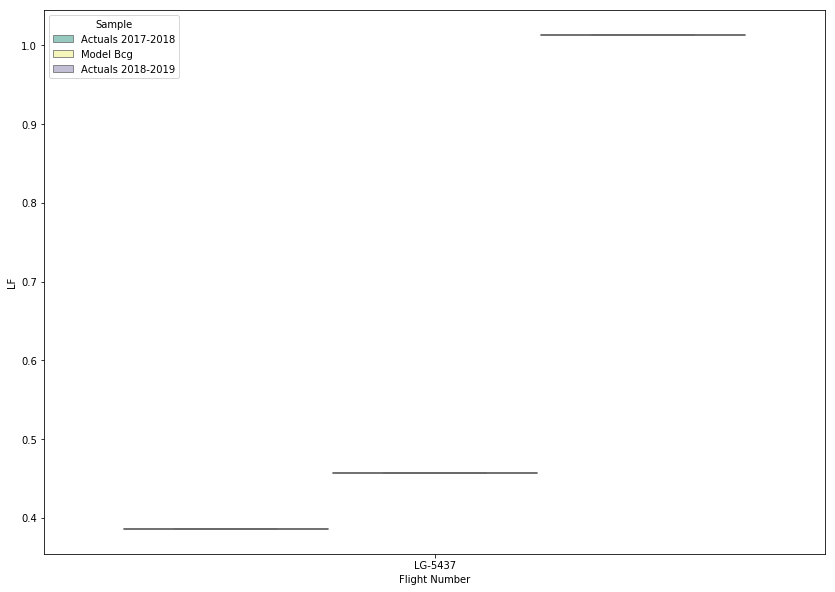

In [602]:
Box_LF_old=Bcg[cluster_variables+['LF_old']].rename(columns={'LF_old': 'LF'})
Box_LF_old['Sample']='Actuals 2017-2018'
Box_LF_actual=Bcg[cluster_variables+['LF_actual']].rename(columns={'LF_actual': 'LF'})
Box_LF_actual['Sample']='Actuals 2018-2019'
Box_LF_new=Bcg[cluster_variables+['LF_new']].rename(columns={'LF_new': 'LF'})
Box_LF_new['Sample']='Model Bcg'

Box_LF=pd.concat([Box_LF_old,Box_LF_new,Box_LF_actual])

Box_LF['Cluster']=Box_LF['Flight Number']+'_'+Box_LF['Weekday'].astype('str')+'_'+Box_LF['SEASON']

fig= plt.figure(figsize=(14,10))
ax = sns.boxplot(x="Flight Number", y="LF", hue="Sample",
data=Box_LF.loc[(Box_LF['Route']=='LUX-CPH')&(Box_LF['SEASON']=='L')&(Box_LF['Weekday']==7),:], palette="Set3")

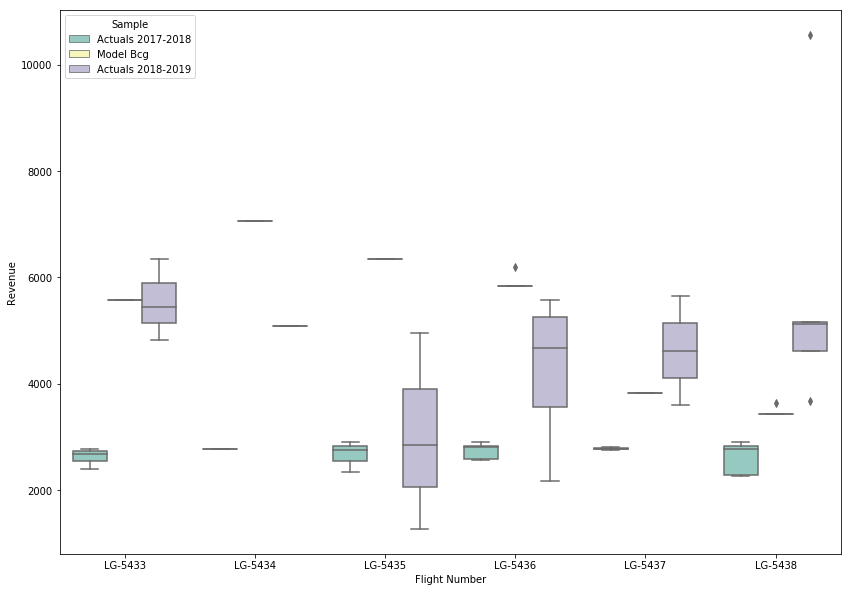

In [604]:
Box_Revenue_old=Bcg[cluster_variables+['Revenue_old']].rename(columns={'Revenue_old': 'Revenue'})
Box_Revenue_old['Sample']='Actuals 2017-2018'
Box_Revenue_actual=Bcg[cluster_variables+['Revenue_actual']].rename(columns={'Revenue_actual': 'Revenue'})
Box_Revenue_actual['Sample']='Actuals 2018-2019'
Box_Revenue_new=Bcg[cluster_variables+['Revenue_new']].rename(columns={'Revenue_new': 'Revenue'})
Box_Revenue_new['Sample']='Model Bcg'

Box_Revenue=pd.concat([Box_Revenue_old,Box_Revenue_new,Box_Revenue_actual])

Box_Revenue['Cluster']=Box_Revenue['Flight Number']+'_'+Box_Revenue['Weekday'].astype('str')+'_'+Box_Revenue['SEASON']

fig= plt.figure(figsize=(14,10))
ax = sns.boxplot(x="Flight Number", y="Revenue", hue="Sample",
data=Box_Revenue.loc[(Box_Revenue['Route']=='LUX-CPH')&(Box_Revenue['SEASON']=='M')&(Box_Revenue['Weekday']==1),:], palette="Set3")

In [ ]:
Bcg